# Classification of Diabetic People.

- The aim of this project is to look at the metadata related to the health stats of people and classify whether the person suffers from **diabetes** or not.

In [15]:
%matplotlib inline

In [16]:
import matplotlib.pyplot as plt

In [17]:
import pandas as pd
import numpy as np
from IPython.display import Image
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [18]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [19]:
train_raw = pd.read_csv(r'D:\ML\Classification with Random Forests and KNN\Diabetes_Xtrain.csv',low_memory= 0)
y_raw = pd.read_csv(r'D:\ML\Classification with Random Forests and KNN\Diabetes_Ytrain.csv',low_memory=0)
test_raw = pd.read_csv(r'D:\ML\Classification with Random Forests and KNN\Diabetes_Xtest.csv',low_memory=0)

In [20]:
train_raw


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
...,...,...,...,...,...,...,...,...
571,2,111,60,0,0,26.2,0.343,23
572,7,187,68,39,304,37.7,0.254,41
573,2,122,60,18,106,29.8,0.717,22
574,4,154,72,29,126,31.3,0.338,37


In [21]:
train_raw.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [22]:
test_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [23]:
y_raw.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


## Handling Missing Values


In [24]:
tr = dict()
te = dict()

for k in train_raw.columns:
    tr[k]=0
    if(k=='Pregnancies'):
        continue
    for i in train_raw[k]:
        if(i==0):
            tr[k]+=1
for k in test_raw.columns:
    te[k]=0
    if(k=='Pregnancies'):
        continue
    for i in test_raw[k]:
        if(i==0):
            te[k]+=1
            
print(color.BOLD+"The number of missing values are:"+color.END)
print(color.UNDERLINE+"Training Set"+color.END)
for i in tr.items():print(i)
print(color.UNDERLINE+"Test set"+color.END)
for i in te.items():print(i)

The number of missing values are:
Training Set
('Pregnancies', 0)
('Glucose', 3)
('BloodPressure', 29)
('SkinThickness', 171)
('Insulin', 278)
('BMI', 9)
('DiabetesPedigreeFunction', 0)
('Age', 0)
Test set
('Pregnancies', 0)
('Glucose', 2)
('BloodPressure', 6)
('SkinThickness', 56)
('Insulin', 96)
('BMI', 2)
('DiabetesPedigreeFunction', 0)
('Age', 0)


- The above analysis states that **there are many missing values in the test and the training set**
- These missing values are replaced by the **respective medians of the columns in the raw dataset** the code for which is written below.

# Replacing missing values with MEAN.

- The missing values of the training and test sets were **updated with the means of the respective columns** of the training data set wherever they were missing.
- A crucial thing to be noted was that the **same values of the mean** were used for the **test data set** and the **training data set.**

### - Training Set

In [25]:
miss_col = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
miss=dict()
mean = dict()
for c in miss_col:
    data = train_raw[c].values
    mean[c] = np.mean(data)
    print("Mean for ",c,":",mean[c])
    i=0
    for k in data:
        if k == 0:
            train_raw.at[i,c] = mean[c]
            miss[c]=miss.get(c,0)+1
        i+=1
print(miss)

Mean for  Glucose : 119.97569444444444
Mean for  BloodPressure : 68.82638888888889
Mean for  SkinThickness : 20.364583333333332
Mean for  Insulin : 76.16666666666667
Mean for  BMI : 31.857291666666665
{'Glucose': 3, 'BloodPressure': 29, 'SkinThickness': 171, 'Insulin': 278, 'BMI': 9}


### - Test Set

In [26]:
miss_test = dict()
for c in miss_col:
    data = test_raw[c].values
    print("Mean for ",c," is:",mean[c])
    i = 0
    for k in data:
        if k == 0:
            test_raw.at[i,c] = mean[c]
            miss_test[c] = miss_test.get(c,0)+1
        i+=1
print(miss_test)

Mean for  Glucose  is: 119.97569444444444
Mean for  BloodPressure  is: 68.82638888888889
Mean for  SkinThickness  is: 20.364583333333332
Mean for  Insulin  is: 76.16666666666667
Mean for  BMI  is: 31.857291666666665
{'Glucose': 2, 'BloodPressure': 6, 'SkinThickness': 56, 'Insulin': 96, 'BMI': 2}


# Describing Variables

- The **training dataset and test dataset** comprises of 8 columns each which are **'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'**
- These 8 form the **independent variables** for our dataset.
- The y_train dataset consists of the **dependent variable OUTCOME**. It has boolean values based on the fact whether a particular person is **DIABETIC** or **NON - DIABETIC**.
- **Diabetic** - 1
- **NonDiabetic** - 0
- All of the columns of the **training dataset** have been described below.


In [95]:
combine.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.758681,120.595486,72.250000,26.302083,112.847222,32.355062,0.481519,32.954861,0.348958
std,3.328783,30.291648,12.684396,9.695668,88.151062,7.074152,0.336910,11.878137,0.477055
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.000000,76.000000,27.300000,0.247750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,22.000000,76.000000,32.000000,0.381500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.725000,0.641250,40.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000,1.000000


## Scatter plots for updated variables

Text(0.5, 0, 'Person ID')

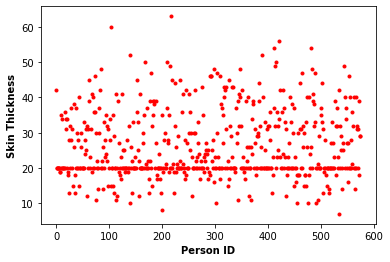

In [29]:
plt.scatter([i for i in range(576)],train_raw['SkinThickness'],marker='.',color = 'red')
plt.ylabel('Skin Thickness',fontweight ='bold')
plt.xlabel('Person ID',fontweight = 'bold')

Text(0.5, 0, 'Person ID')

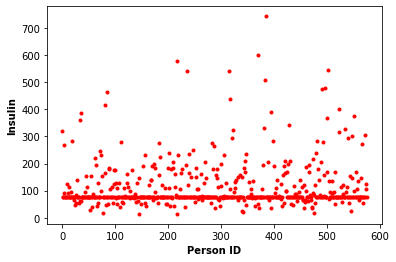

In [30]:
plt.scatter([i for i in range(576)],train_raw['Insulin'],marker='.',color = 'red')
plt.ylabel("Insulin",fontweight ='bold')
plt.xlabel('Person ID',fontweight = 'bold')

- The above two scatter plots show, as an example, the **large number of missing values** that were actually present in the data set and thus now appear to be replaced by the line that is equal to the **mean of the feature.**

In [39]:
combine = pd.concat([train_raw,y_raw],axis=1)
combine.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,168,88,42,321,38.2,0.787,40,1
1,8,110,76,20,76,27.8,0.237,58,0
2,7,147,76,20,76,39.4,0.257,43,1
3,2,100,66,20,90,32.9,0.867,28,1
4,4,129,86,20,270,35.1,0.231,23,0


- According to the correlation analysis, it was noted that **BloodPressure and SkinThickness** were the most weakly correlated variables.

In [205]:
combine.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.174091,0.249675,0.012716,0.007366,0.065042,-0.036454,0.555994,0.213015
Glucose,0.174091,1.000000,0.225911,0.125461,0.403696,0.231773,0.149272,0.260808,0.491901
BloodPressure,0.249675,0.225911,1.000000,0.157455,0.025626,0.277801,-0.005709,0.355526,0.171509
SkinThickness,0.012716,0.125461,0.157455,1.000000,0.270468,0.563459,0.170513,0.016518,0.166297
Insulin,0.007366,0.403696,0.025626,0.270468,1.000000,0.175689,0.198604,0.031145,0.194650
BMI,0.065042,0.231773,0.277801,0.563459,0.175689,1.000000,0.164809,0.054082,0.339733
DiabetesPedigreeFunction,-0.036454,0.149272,-0.005709,0.170513,0.198604,0.164809,1.000000,0.034847,0.179672
Age,0.555994,0.260808,0.355526,0.016518,0.031145,0.054082,0.034847,1.000000,0.204733
Outcome,0.213015,0.491901,0.171509,0.166297,0.194650,0.339733,0.179672,0.204733,1.000000


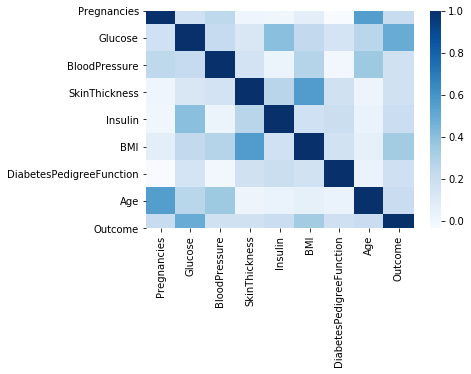

In [206]:
sns.heatmap(combine.corr(),cmap = 'Blues')
plt.savefig("D:\ML\Classification with Random Forests and KNN\corr_heatmap.png",dpi=200)

### The Distribution of classes
- The below bar plot shows us that the **training data sample does not have uniform distribution of the classes**
- The following graph gives an **important insight** that is that there exists **class imbalance**.
- This means our model will learn the features of **class 0 or Non-Diabetics** far better than it would learn how to classify Diabetics.

Percentage of ones: 34.89583333333333 %
Percentage of zeroes: 65.10416666666666 %


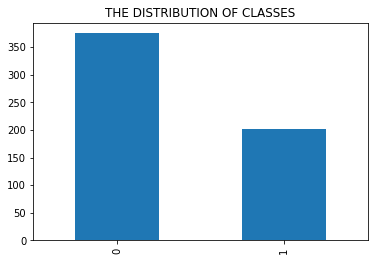

In [55]:
y_raw.Outcome.value_counts().plot.bar(title = 'THE DISTRIBUTION OF CLASSES')
print("Percentage of ones:",100*(y_raw.Outcome.value_counts()[1]/len(y_raw)),"%")
print("Percentage of zeroes:",100*(y_raw.Outcome.value_counts()[0]/len(y_raw)),"%")
plt.savefig("D:\ML\Classification with Random Forests and KNN\dist_raw.png",dpi=200)

# Evaluation metric
### F1 score
- We can see that since the data is not distributed uniformly and hence the better evaluation metric to **accuracy of the model** will be **the F1 score of the model**.
- To define F1 score, certain other metrics have to be calculated which are-



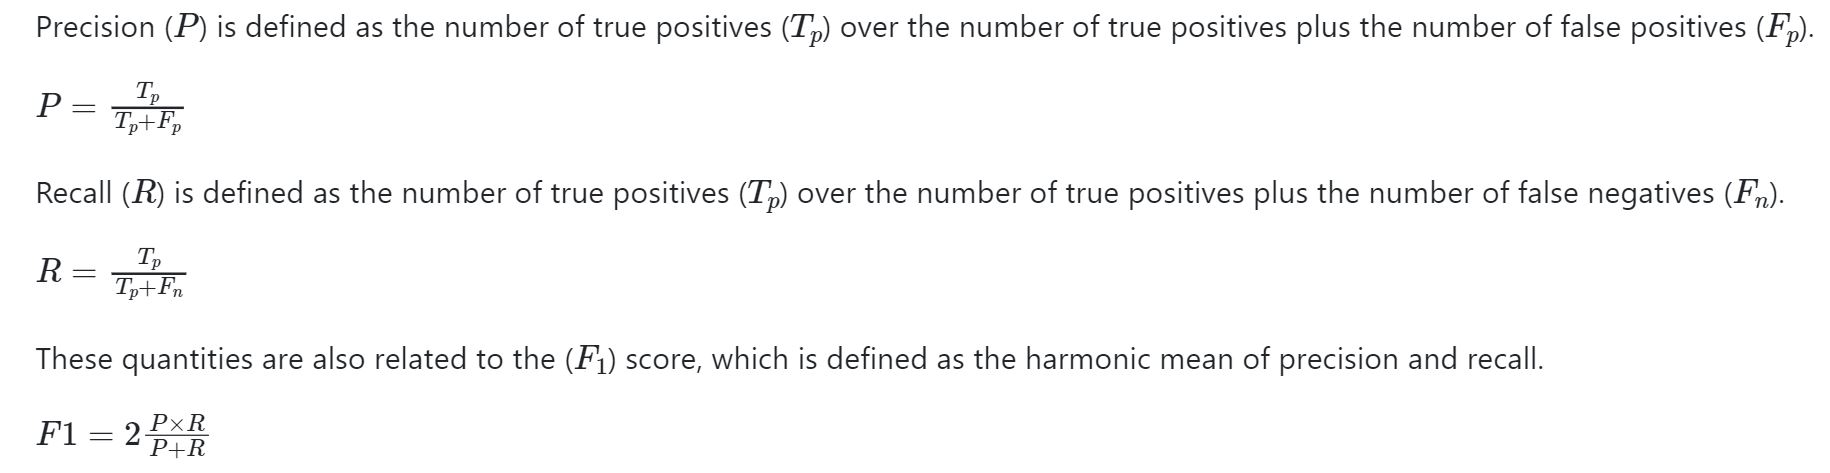

In [17]:
Image("D:\ML\Random Forest Classifier\metrics.png")

- According to the above definitions we can observe the **higher the precision, the lesser the false positive predictions** and **the higher the recall, the lesser the false negative predictions**.
- Since the regular mean treats all values equally and the **harmonic mean gives much more weight to low values** thereby punishing the extreme values more, the classifier will only get a **high F-1 score if both recall and precision are high.**

In [44]:
def prec(actual,pred):
    tp=0
    fp=0
    for i,k in zip(actual,pred):
        if(i==k and i==1):
            tp+=1
        if(i==0 and k==1):
            fp+=1
    return (tp/(tp+fp))
        

In [45]:
def recall(actual,pred):
    tp=0
    fn=0
    for i,k in zip(actual,pred):
        if(i==k and i==1):
            tp+=1
        if(i==1 and k==0):
            fn+=1
    return (tp/(tp+fn))

In [47]:
from sklearn.metrics import f1_score,accuracy_score

## Splitting data into validation  and training sets.

In [48]:
x_train, x_valid ,y_train, y_valid = train_test_split(train_raw, y_raw, test_size = 120,random_state = 2) 

TRAINING SET
Percentage of ones: 34.64912280701755 %
Percentage of zeroes: 65.35087719298247 %
PROBABILITIES OF CLASSIFICATION
Diabetic :  0.34649122807017546
Non-Diabetic :  0.6535087719298246


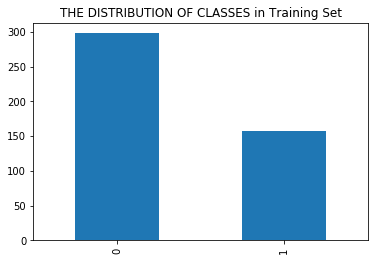

In [565]:
print("TRAINING SET")
y_train.Outcome.value_counts().plot.bar(title = 'THE DISTRIBUTION OF CLASSES in Training Set')
print("Percentage of ones:",100*(y_train.Outcome.value_counts()[1]/len(y_train)),"%")
print("Percentage of zeroes:",100*(y_train.Outcome.value_counts()[0]/len(y_train)),"%")
print(color.DARKCYAN +"PROBABILITIES OF CLASSIFICATION"+color.END)
print("Diabetic : ",y_train.Outcome.value_counts()[1]/len(y_train))
print("Non-Diabetic : ",y_train.Outcome.value_counts()[0]/len(y_train))
plt.savefig(r"D:\ML\Random Forest Classifier\dist_training.png",dpi=200)

VALIDATION SET
Percentage of ones: 35.833333333333336 %
Percentage of zeroes: 64.16666666666667 %
PROBABILITIES OF CLASSIFICATION
Diabetic :  0.35833333333333334
Non-Diabetic :  0.6416666666666667


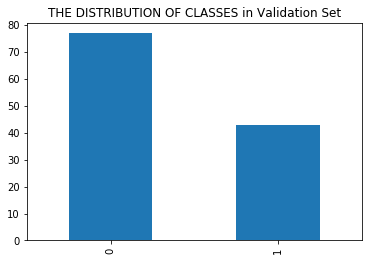

In [564]:
print(color.BOLD+"VALIDATION SET"+color.END)
y_valid.Outcome.value_counts().plot.bar(title = 'THE DISTRIBUTION OF CLASSES in Validation Set')
print("Percentage of ones:",100*(y_valid.Outcome.value_counts()[1]/len(y_valid)),"%")
print("Percentage of zeroes:",100*(y_valid.Outcome.value_counts()[0]/len(y_valid)),"%")
print(color.DARKCYAN +"PROBABILITIES OF CLASSIFICATION"+color.END)
print("Diabetic : ",y_valid.Outcome.value_counts()[1]/len(y_valid))
print("Non-Diabetic : ",y_valid.Outcome.value_counts()[0]/len(y_valid))
plt.savefig(r"D:\ML\Random Forest Classifier\dist_validation.png",dpi=200)

# MODELS 
### - Random Forest Classifier

In [53]:
m = RandomForestClassifier(n_estimators=20,max_features= 0.6,n_jobs=-1)
m.fit(x_train,list(y_train.Outcome))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

- Training Score

In [54]:
m.score(x_train,list(y_train.Outcome))

1.0

- Validation Score

In [55]:
m.score(x_valid,list(y_valid.Outcome))

0.7583333333333333

Trees: 25 Score: 0.7666666666666667 Max features: 0.8


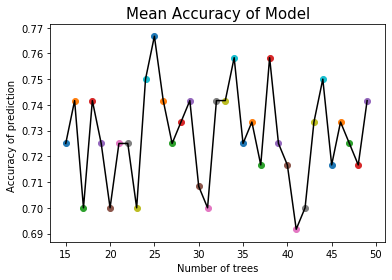

In [120]:
plt.title("Mean Accuracy of Model",fontsize = 15)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy of prediction ")
now_score = -1
est = 0
max_f = 0
a = []
for i in range(15,50):
    m = RandomForestClassifier(n_estimators=i,max_features=0.8,n_jobs=-1)
    m.fit(x_train,list(y_train.Outcome))
    curr = m.score(x_valid,y_valid.Outcome)
    a.append(curr)
    plt.scatter(i,curr)
    if(curr > now_score):
        now_score = curr
        est = i
print("Trees:",est,"Score:",now_score,"Max features:",0.8)
plt.plot([i for i in range(15,50)],a,color = 'black')
plt.savefig(r"D:\ML\Classification with Random Forests and KNN\accuarcy_rforest.png",dpi=200)

Trees: 27 Score: 0.6904761904761904 Max features: 0.8


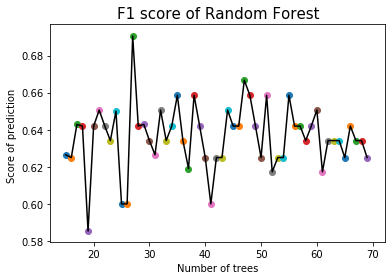

In [121]:
plt.title("F1 score of Random Forest",fontsize = 15)
plt.xlabel("Number of trees")
plt.ylabel("Score of prediction ")
now = -1
f_value = 0
f_vals =[]
estimators = 0
for i in range(15,70):
    
    m = RandomForestClassifier(n_estimators=i,max_features=0.8,n_jobs=-1,bootstrap=0)        
    m.fit(x_train,list(y_train.Outcome))
    curr = f1_score(y_valid.Outcome,m.predict(x_valid))
    plt.scatter(i,curr)
    f_vals.append(curr)
    if(curr > now):
        now = curr
        estimators=i
print("Trees:",estimators,"Score:",now,"Max features:",0.8)
plt.plot([i for i in range(15,70)],f_vals,color= 'black')
plt.savefig(r"D:\ML\Classification with Random Forests and KNN\f1_score_rforest.png",dpi=200)

- From the above graphs, we can see that the model with **20-30** trees had the best accuracy and the f1 score.
- Now, builiding final model on 20 trees we get the below model.

In [123]:
m = RandomForestClassifier(n_estimators=25,max_features=0.8,bootstrap=0)
m.fit(x_train,list(y_train.Outcome))

RandomForestClassifier(bootstrap=0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [124]:
y_valid["Index"] = [i for i in range(len(y_valid))]

E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
y_valid.head(n=3)

,Outcome,Index
309,1,0
192,1,1
524,0,2


In [126]:
preds = m.predict(x_valid)

In [127]:
c1 = confusion_matrix(y_valid['Outcome'],preds)

# rows are the actual class
# collumns are the predicted class
print(c1)

[[64 13]
 [17 26]]


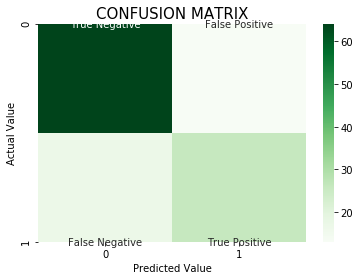

In [129]:
labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(c1,annot =labels,fmt='',cmap = 'Greens')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("CONFUSION MATRIX",fontsize = 15)
plt.savefig("D:\ML\Classification with Random Forests and KNN\cmatrix_rforest.png",dpi=200)


In [204]:
print("Recall of predicted values:",recall(y_valid.Outcome,preds))
print("Precision of predicted values:",prec(y_valid.Outcome,preds))
print("The F1 score is :",f1_score(y_valid.Outcome,preds)*100,"%")
print("The mean accuracy of model is:",accuracy_score(y_valid.Outcome,preds)*100,"%")

Recall of predicted values: 0.6046511627906976
Precision of predicted values: 0.6666666666666666
The F1 score is : 63.414634146341456 %
The mean accuracy of model is: 75.0 %


## -KNN Classifier

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
train_raw.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

## F1 score and Accuracy
- In the correlation matrix it was noted that **BloodPressure** and **SkinThickness** were very weakly correlated variables.
- Hence, the model was formed by dropping each of them one by one and the f1 score of the model was plotted.
- The score did not improve but it was found that **7 neighbours** were the optimum number of the neighbours for the dataset.

Dropping BP
Dropping Skin Thickness


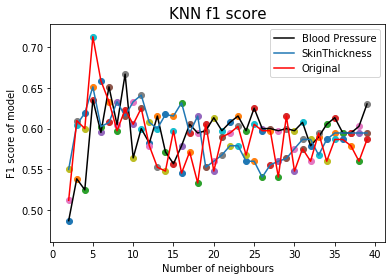

In [135]:
fs1=[]
fs2=[]
fs=[]
labels = ['BloodPressure', 'SkinThickness']
plt.xlabel("Number of neighbours")
plt.ylabel("F1 score of model")
for k in labels:
    for i in range(2,40):
        knn = KNeighborsClassifier(n_neighbors= i, weights='distance',metric='minkowski')
        knn.fit(x_train.drop(k,axis=1),list(y_train.Outcome))
        if(k=='BloodPressure'):
            fs1.append(f1_score(y_valid.Outcome, knn.predict(x_valid.drop(k,axis=1))))
            plt.scatter(i,f1_score(y_valid.Outcome, knn.predict(x_valid.drop(k,axis=1))))
        else:
            fs2.append(f1_score(y_valid.Outcome, knn.predict(x_valid.drop(k,axis=1)))) 
            plt.scatter(i,f1_score(y_valid.Outcome, knn.predict(x_valid.drop(k,axis=1))))
for i in range(2,40):
        knn = KNeighborsClassifier(n_neighbors= i, weights='distance',metric='minkowski')
        knn.fit(x_train,list(y_train.Outcome))
        fs.append(f1_score(y_valid.Outcome, knn.predict(x_valid)))
        plt.scatter(i,f1_score(y_valid.Outcome, knn.predict(x_valid)))
print("Dropping BP")

plt.plot([i for i in range(2,40)],fs1,color = 'black',label = 'Blood Pressure')
print("Dropping Skin Thickness")
plt.title("KNN f1 score",fontsize=15)
plt.plot([i for i in range(2,40)],fs2,label = 'SkinThickness')
plt.plot([i for i in range(2,40)],fs,label='Original',color='red')
plt.legend()
plt.savefig("D:\ML\Classification with Random Forests and KNN\knn_f1_score.png",dpi=200)

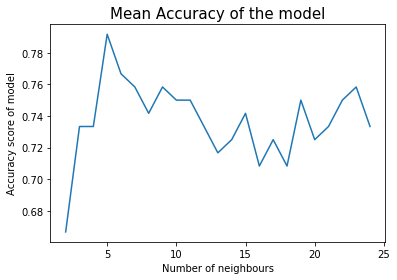

In [207]:
acc=[]
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy score of model")
for i in range(2,25):
    knn = KNeighborsClassifier(n_neighbors= i, weights='distance',metric='minkowski')
    knn.fit(x_train,list(y_train.Outcome))
    acc.append(accuracy_score(y_valid.Outcome, knn.predict(x_valid)))
plt.title("Mean Accuracy of the model",fontsize=15)
plt.plot([i for i in range(2,25)],acc)
plt.savefig("D:\ML\Classification with Random Forests and KNN\knn_accuracy.png",dpi=200)

In [194]:
knn = KNeighborsClassifier(n_neighbors= 5, weights='distance',metric = 'minkowski')
knn.fit(x_train,list(y_train.Outcome))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [195]:
pred_knn = knn.predict(x_valid)


In [196]:
c1= confusion_matrix(y_valid['Outcome'],pred_knn)
print(c1)

[[64 13]
 [12 31]]


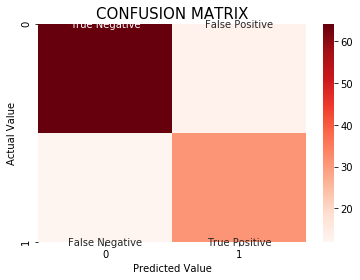

In [197]:
labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(c1,annot =labels,fmt='',cmap = 'Reds')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("CONFUSION MATRIX",fontsize = 15)
plt.savefig("D:\ML\Classification with Random Forests and KNN\c_matrix_knn.png",dpi=200)

In [198]:
print("Precision of the model on validation:",prec(y_valid.Outcome,pred_knn))
print("Recall of the model on validation:",recall(y_valid.Outcome,pred_knn))
print("Accuracy of model:",accuracy_score(y_valid.Outcome,pred_knn))
print("F1 score of model:",f1_score(y_valid.Outcome,pred_knn))

Precision of the model on validation: 0.7045454545454546
Recall of the model on validation: 0.7209302325581395
Accuracy of model: 0.7916666666666666
F1 score of model: 0.7126436781609196


- It is noted that the KNN classifier performs **better** than the Random Forest Classifier and thus it is chosen for the final prediction set.

## FINAL MODEL 
###   KNN classifier with 5 nearest neighbours as the k value and the distance type is minkowski.

In [199]:
test_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,76,28.7,0.092,25
3,13,76,60,20,76,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [200]:
final_predictions = knn.predict(test_raw)

In [201]:
final = pd.DataFrame({'Outcome':final_predictions})

In [202]:
final.head()

,Outcome
0,1
1,0
2,0
3,0
4,0


In [203]:
final.to_csv(r"D:\ML\Classification with Random Forests and KNN\final_predictions.csv")